This project focuses on gathering and analyzing financial and economic data, specifically targeting Apple Inc. (AAPL) stock prices, Quandl data related to AAPL, and the U.S. unemployment rate. Here’s a detailed description of your project, covering the methodologies, datasets, and visualizations.

# Project Overview
This project aims to analyze the historical stock performance of Apple Inc. and its correlation with economic indicators, particularly the unemployment rate in the United States. By utilizing various data sources such as Yahoo Finance, Quandl, and the Federal Reserve Economic Data (FRED) API, the project provides insights into how macroeconomic factors influence stock prices.

In [18]:
import pandas as pd
from sqlalchemy import create_engine
import yfinance as yf
import quandl
from fredapi import Fred
import warnings
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

## Data Sources

### Yahoo Finance
- **Data Retrieved**: Historical stock prices for **Apple Inc. (AAPL)** from January 1, 2020, to January 1, 2023.
- **Variables**:
  - **Date**: The trading date.
  - **Open**: The stock price at market open.
  - **High**: The highest stock price during the trading day.
  - **Low**: The lowest stock price during the trading day.
  - **Close**: The stock price at market close.
  - **Adj Close**: The adjusted closing price accounting for dividends and stock splits.
  - **Volume**: The number of shares traded.
- **Purpose**: To analyze the trends and patterns in Apple's stock performance over a specified period.

### Quandl
- **Data Retrieved**: Additional datasets from **Quandl** related to **Apple Inc.** (such as end-of-day stock prices).
- **Variables**: Similar to Yahoo Finance, including daily prices and volumes.
- **Purpose**: To cross-reference and validate data from Yahoo Finance, ensuring accuracy and completeness.

### Federal Reserve Economic Data (FRED)
- **Data Retrieved**: Monthly unemployment rate data (**UNRATE**) for the same period.
- **Variables**:
  - **Date**: The date for each unemployment rate entry.
  - **Unemployment Rate**: The percentage of the labor force that is unemployed.
- **Purpose**: To examine the relationship between Apple’s stock prices and the unemployment rate, providing insights into how economic conditions may affect investor sentiment and stock valuation.

## Data Collection and Processing

- **Data Fetching**: Functions are implemented to retrieve data from **Yahoo Finance**, **Quandl**, and **FRED**, utilizing their respective APIs. Error handling is included to ensure the project can gracefully manage potential data retrieval issues.
- **Data Display**: The retrieved datasets are displayed in a structured format, allowing for initial inspections and ensuring that the data is as expected before analysis.
- **Data Saving**: The project includes functionality to save the retrieved data into **CSV files** for future reference and offline analysis, ensuring data persistence.

In [19]:
QUANDL_API_KEY = 'FuCDS95Awv5MBy4pVFvV'
FRED_API_KEY = '1aea7e0f5e128895b24e237dc3a361fb' 

In [ ]:
# Function to fetch Yahoo Finance data
def fetch_yahoo_finance_data(ticker, start_date, end_date):
    """Fetch historical stock data from Yahoo Finance."""
    data = yf.download(ticker, start=start_date, end=end_date)
    data.reset_index(inplace=True)  # Reset index to make date a column
    return data

# Function to fetch data from Quandl
def fetch_quandl_data(dataset):
    """Fetch data from Quandl."""
    try:
        quandl.ApiConfig.api_key = QUANDL_API_KEY
        return quandl.get(dataset)
    except Exception as e:
        print(f"Error fetching data from Quandl: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on error

# Function to fetch data from FRED
def fetch_fred_data(series_id, start_date, end_date):
    """Fetch economic data from FRED."""
    fred = Fred(api_key=FRED_API_KEY)
    return fred.get_series(series_id, start=start_date, end=end_date)

# Function to display DataFrame instead of saving to a database
def display_data(df, name):
    """Display DataFrame contents."""
    print(f"Data for {name}:")
    print(df.head())  # Display first few rows of the DataFrame

# Example usage
if __name__ == "__main__":
    # Fetch data
    stock_data = fetch_yahoo_finance_data("AAPL", "2020-01-01", "2023-01-01")
    quandl_data = fetch_quandl_data("EOD/AAPL")  # Update with the correct dataset code
    unemployment_rate = fetch_fred_data("UNRATE", "2020-01-01", "2023-01-01")

    # Display fetched data
    display_data(stock_data, 'Apple Stock Data')
    display_data(quandl_data, 'Quandl AAPL Data')
    display_data(unemployment_rate.to_frame(name='Unemployment Rate'), 'Unemployment Rate')


## Data Visualization
A key feature of this project is the visualization of the data. A plot is created to display the adjusted closing prices of **Apple Inc.** alongside the **unemployment rate** over time. 
### Purpose of Visualization
The visualization aims to identify any potential correlations between Apple’s stock price trends and the unemployment rate, helping to analyze how economic factors impact financial markets.

[*********************100%***********************]  1 of 1 completed


Error fetching data from Quandl: (Status 410) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.
Apple Stock Data:
Price                       Date  Adj Close      Close       High        Low  \
Ticker                                 AAPL       AAPL       AAPL       AAPL   
0      2020-01-02 00:00:00+00:00  72.876106  75.087502  75.150002  73.797501   
1      2020-01-03 00:00:00+00:00  72.167610  74.357498  75.144997  74.125000   
2      2020-01-06 00:00:00+00:00  72.742645  74.949997  74.989998  73.187500   
3      2020-01-07 00:00:00+00:00  72.400528  74.597504  75.224998  74.370003   
4      2020-01-08 00:00:00+00:00  73.565201  75.797501  76.110001  74.290001   

Price        Open     Volume  
Ticker       AAPL       AAPL  
0       74.059998  135480400  
1       74.287498  146322800  
2       73.447502  118387200  
3       74.959999  108872000  
4       74.290001  132079200  
Quandl AAPL Data:
Empty DataFrame
Columns: 

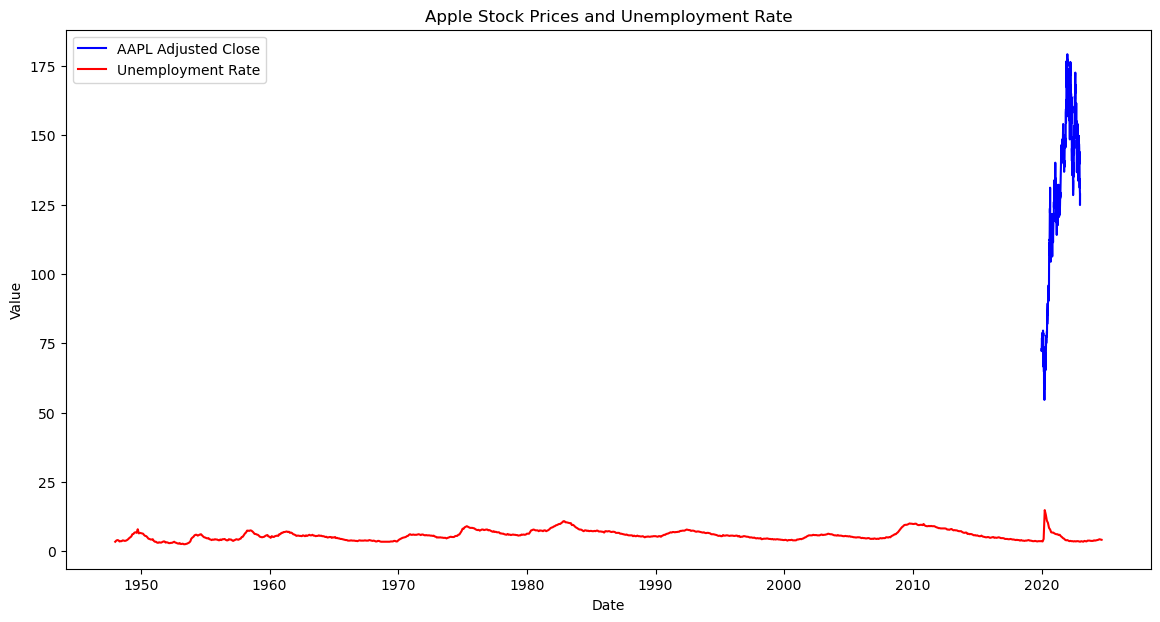

In [23]:

# Data Visualization Function
def plot_data(stock_data, unemployment_data):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Date'], stock_data['Adj Close'], label='AAPL Adjusted Close', color='blue')
    plt.plot(unemployment_data.index, unemployment_data, label='Unemployment Rate', color='red')
    plt.title('Apple Stock Prices and Unemployment Rate')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    stock_data = fetch_yahoo_finance_data("AAPL", "2020-01-01", "2023-01-01")
    quandl_data = fetch_quandl_data("EOD/AAPL")
    unemployment_rate = fetch_fred_data("UNRATE", "2020-01-01", "2023-01-01")

    # Display data
    print("Apple Stock Data:")
    print(stock_data.head())
    
    print("Quandl AAPL Data:")
    print(quandl_data.head())
    
    print("Unemployment Rate Data:")
    print(unemployment_rate.head())

    # Plot data
    plot_data(stock_data, unemployment_rate.to_frame(name='Unemployment Rate'))

### Plot Description
- The **x-axis** represents the timeline from January 1, 2020, to January 1, 2023.
- The **y-axis** shows the values for both the adjusted closing price and the unemployment rate.
- The plot includes:
  - A **blue line** representing Apple’s adjusted closing prices, allowing viewers to observe the stock's performance fluctuations.
  - A **red line** indicating the unemployment rate, providing context on economic conditions during the same period.

**The graph plots the Apple stock price (AAPL Adjusted Close) and the Unemployment Rate over a period from approximately 1950 to 2023. The x-axis represents time, and the y-axis shows the values for both variables.**

**Key Observations**

Apple Stock Price (AAPL Adjusted Close):

The stock price shows a significant upward trend over the years, especially from the late 1990s onwards. This aligns with Apple's period of rapid growth and innovation.
There are periods of volatility, particularly during the 2000 dot-com bubble and the 2008 financial crisis, where the stock price experienced declines.
Overall, the long-term trend is positive, reflecting Apple's success as a technology company.
Unemployment Rate:

The unemployment rate fluctuates over time, with peaks during recessions and troughs during periods of economic expansion.
There is a general downward trend in the unemployment rate over the long term, suggesting overall economic growth.
The most recent data point (2023) shows a relatively low unemployment rate.
Relationship between the two variables:

While there might be some correlation between the two variables at certain points, it's important to note that:

The stock market is influenced by various factors, including company performance, industry trends, economic conditions, and investor sentiment.   
Unemployment is a broader macroeconomic indicator that reflects the overall health of the labor market.
Therefore, it's not straightforward to draw a direct causal relationship between the two variables.

**Additional Insights:**

The graph could be further analysed to identify specific periods of correlation or divergence between the two variables.
It would be interesting to compare the trends with other economic indicators or industry-specific data to gain a more comprehensive understanding.
Limitations:

The graph only shows historical data, and it's important to consider that future trends may not follow the same patterns.
The unemployment rate is a national average, and regional or industry-specific unemployment rates may vary.

In [26]:
# Function to save DataFrames to CSV
def save_to_csv(dataframe, filename):
    dataframe.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

In [30]:
# Save data to CSV
save_to_csv(stock_data, 'apple_stock_data.csv')
save_to_csv(quandl_data, 'quandl_aapl_data.csv')
save_to_csv(unemployment_rate.to_frame(name='Unemployment Rate'), 'unemployment_rate.csv')

Data saved to apple_stock_data.csv
Data saved to quandl_aapl_data.csv
Data saved to unemployment_rate.csv



## Conclusion

This project not only provides a detailed view of **Apple Inc.'s** stock performance but also connects it to broader economic indicators, showcasing the interplay between individual companies and macroeconomic trends. The methodology includes robust data sourcing, processing, and visualization techniques, paving the way for further analysis and exploration, such as statistical modeling or predictive analytics based on the gathered datasets. This approach can be expanded to include additional economic indicators, creating a comprehensive financial analysis tool.
